# Modeling Notebook

In this notebook I explore the different baseline models. I decided to use the most common classification models, using Accuracy score as the scoring metric. Since we want to make sure that each model predicts with the best accuracy to prevent any loss of attention or revenue on customers that are not recurrent churners or are possible to churn.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns

pd.set_option('display.max_columns', 1000)

In [35]:
df=pd.read_csv("modeling_customer_df.csv",index_col="Unnamed: 0")

In [36]:
df.head()

,senior_citizen,partner,dependents,tenure_months,phone_service,device_protection,tech_support,paperless_billing,monthly_charges,churn_value,churn_score,cltv,satisfaction_score,churn_score.1,referred_a_friend,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,under_30,number_of_dependents,tel_internet_service,tel_online_securit,tel_online_backup,tel_multiple_lines,tel_streaming_tv,tel_total_charges,tel_streaming_movies,cit_Acton,cit_Adelanto,cit_Adin,cit_Agoura Hills,cit_Aguanga,cit_Ahwahnee,cit_Alameda,cit_Alamo,cit_Albany,cit_Albion,cit_Alderpoint,cit_Alhambra,cit_Aliso Viejo,cit_Alleghany,cit_Alpaugh,cit_Alpine,cit_Alta,cit_Altadena,cit_Alturas,cit_Alviso,cit_Amador City,cit_Amboy,cit_Anaheim,cit_Anderson,cit_Angels Camp,cit_Angelus Oaks,cit_Angwin,cit_Annapolis,cit_Antelope,cit_Antioch,cit_Anza,cit_Apple Valley,cit_Applegate,cit_Aptos,cit_Arbuckle,cit_Arcadia,cit_Arcata,cit_Armona,cit_Arnold,cit_Aromas,cit_Arroyo Grande,cit_Artesia,cit_Arvin,cit_Atascadero,cit_Atherton,cit_Atwater,cit_Auberry,cit_Auburn,cit_Avalon,cit_Avenal,cit_Avery,cit_Avila Beach,cit_Azusa,cit_Badger,cit_Baker,cit_Bakersfield,cit_Baldwin Park,cit_Ballico,cit_Bangor,cit_Banning,cit_Barstow,cit_Bass Lake,cit_Bayside,cit_Beale Afb,cit_Beaumont,cit_Bell,cit_Bella Vista,cit_Bellflower,cit_Belmont,cit_Belvedere Tiburon,cit_Ben Lomond,cit_Benicia,cit_Benton,cit_Berkeley,cit_Berry Creek,cit_Bethel Island,cit_Beverly Hills,cit_Bieber,cit_Big Bar,cit_Big Bear City,cit_Big Bear Lake,cit_Big Bend,cit_Big Creek,cit_Big Oak Flat,cit_Big Pine,cit_Big Sur,cit_Biggs,cit_Biola,cit_Birds Landing,cit_Bishop,cit_Blairsden Graeagle,cit_Blocksburg,cit_Bloomington,cit_Blue Lake,cit_Blythe,cit_Bodega,cit_Bodega Bay,cit_Bodfish,cit_Bolinas,cit_Bonita,cit_Bonsall,cit_Boonville,cit_Boron,cit_Borrego Springs,cit_Boulder Creek,cit_Boulevard,cit_Bradley,cit_Branscomb,cit_Brawley,cit_Brea,cit_Brentwood,cit_Bridgeport,cit_Bridgeville,cit_Brisbane,cit_Brookdale,cit_Brooks,cit_Browns Valley,cit_Brownsville,cit_Buellton,cit_Buena Park,cit_Burbank,cit_Burlingame,cit_Burney,cit_Burnt Ranch,cit_Burson,cit_Butte City,cit_Buttonwillow,cit_Byron,cit_Cabazon,cit_Calabasas,cit_Calexico,cit_Caliente,cit_California City,cit_California Hot Springs,cit_Calimesa,cit_Calipatria,cit_Calistoga,cit_Callahan,cit_Calpine,cit_Camarillo,cit_Cambria,cit_Camino,cit_Camp Nelson,cit_Campbell,cit_Campo,cit_Campo Seco,cit_Camptonville,cit_Canby,cit_Canoga Park,cit_Cantua Creek,cit_Canyon Country,cit_Canyon Dam,cit_Capay,cit_Capistrano Beach,cit_Capitola,cit_Cardiff By The Sea,cit_Carlotta,cit_Carlsbad,cit_Carmel,cit_Carmel By The Sea,cit_Carmel Valley,cit_Carmichael,cit_Carnelian Bay,cit_Carpinteria,cit_Carson,cit_Caruthers,cit_Casmalia,cit_Caspar,cit_Cassel,cit_Castaic,cit_Castella,cit_Castro Valley,cit_Castroville,cit_Cathedral City,cit_Catheys Valley,cit_Cayucos,cit_Cazadero,cit_Cedar Glen,cit_Cedarville,cit_Ceres,cit_Cerritos,cit_Challenge,cit_Chatsworth,cit_Chester,cit_Chico,cit_Chilcoot,cit_Chino,cit_Chino Hills,cit_Chowchilla,cit_Chualar,cit_Chula Vista,cit_Citrus Heights,cit_Claremont,cit_Clarksburg,cit_Clayton,cit_Clearlake,cit_Clearlake Oaks,cit_Clements,cit_Clio,cit_Clipper Mills,cit_Cloverdale,cit_Clovis,cit_Coachella,cit_Coalinga,cit_Coarsegold,cit_Cobb,cit_Coleville,cit_Colfax,cit_Colton,cit_Columbia,cit_Colusa,cit_Comptche,cit_Compton,cit_Concord,cit_Cool,cit_Copperopolis,cit_Corcoran,cit_Corning,cit_Corona,cit_Corona Del Mar,cit_Coronado,cit_Corte Madera,cit_Costa Mesa,cit_Cotati,cit_Cottonwood,cit_Coulterville,cit_Courtland,cit_Covelo,cit_Covina,cit_Crescent City,cit_Crescent Mills,cit_Cressey,cit_Crestline,cit_Creston,cit_Crockett,cit_Crows Landing,cit_Culver City,cit_Cupertino,cit_Cutler,cit_Cypress,cit_Daggett,cit_Daly City,cit_Dana Point,cit_Danville,cit_Darwin,cit_Davenport,cit_Davis,cit_Davis Cre

In [37]:
#Splitting the data into X and Y
y=df["churn_value"]
X=df[df.columns[df.columns!="churn_value"]]

In [38]:
# Creating Train Test Split.
X_test,X_train,y_test,y_train=train_test_split(X,y, test_size=.2, random_state=2020)

# Vanilla Models

Creating different models as baseline. I want to decide on a model that is able to handle the data more accurately and that I can focus on fine tunning. 

### Logistic Regression

In [39]:
# Instantiating Logistic Regression with Max Iter of 10000 so the model can reach convergence
log_reg=LogisticRegression(max_iter=10000, random_state=40, class_weight="balanced")

In [40]:
log_reg.fit(X_train,y_train)

log_pred=log_reg.predict(X_test)

In [41]:
log_acc=metrics.recall_score(y_test, log_pred)
log_rec=metrics.accuracy_score(y_test, log_pred)
log_f1=metrics.f1_score(y_test,log_pred)

In [42]:
print('Logistic Regression Accuracy: {}'.format(log_acc))
print('Logistic Regression Recall: {}'.format(log_rec))
print('Logistic Regression F1: {}'.format(log_f1))

Logistic Regression Accuracy: 0.9605263157894737
Logistic Regression Recall: 0.9787007454739084
Logistic Regression F1: 0.9605263157894737


This model gave the best results as the original model that was done in the EDA notebook. Accuracy does have room for improvement and it should be investigated forward.

### KNN

In [43]:
# instantiating KNN with a N Neighbors of 5 as baseline.
knn=KNeighborsClassifier(n_neighbors=5)

In [44]:
knn.fit(X_train,y_train)

knn_pred=knn.predict(X_test)

In [45]:
knn_acc=metrics.recall_score(y_test, knn_pred)
knn_rec=metrics.accuracy_score(y_test, knn_pred)
knn_f1=metrics.f1_score(y_test,knn_pred)

In [46]:
print('KNN accuracy: {}'.format(knn_acc))
print('KNN Recall: {}'.format(knn_rec))
print('KNN F1: {}'.format(knn_f1))

KNN accuracy: 0.30986842105263157
KNN Recall: 0.7270145544905928
KNN F1: 0.37983870967741934


This model did not provide great results. It seems that KNN is not able to model the data accordingly and it seems that is not a viable option.

### Random Forest

In [47]:
# Instantiating Random Fores with a max depth of 20 so the model has enough room to grow. 
RF=RandomForestClassifier(max_depth=20,verbose=True, random_state=40,class_weight="balanced")

In [48]:
RF.fit(X_train,y_train)

rf_pred=RF.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [49]:
rf_acc=metrics.recall_score(y_test, rf_pred)
rf_rec=metrics.accuracy_score(y_test, rf_pred)
rf_f1=metrics.f1_score(y_test,rf_pred)

In [50]:
print('Random Forest Accuracy: {}'.format(rf_acc))
print('Random Forest Recall: {}'.format(rf_rec))
print('Random Forest F1: {}'.format(rf_f1))

Random Forest Accuracy: 0.8743421052631579
Random Forest Recall: 0.9378771742988995
Random Forest F1: 0.8836436170212766


Random Forest did show some promice. Although the scores are not as great as Logistic Regression, it coul be imporved by Gridsearch.

### Scores

In [51]:
# Appending the vanilla scores into Dataframe. 
results={"Name":["Logistic Regression","KNN","Random Forest"],"Accuracy":[log_acc,knn_acc,rf_acc],"Recall":[log_rec,knn_rec,rf_rec],"F1":[log_f1,knn_f1,rf_f1]}
score=pd.DataFrame.from_dict(results)
score

,Name,Accuracy,Recall,F1
0,Logistic Regression,0.960526,0.978701,0.960526
1,KNN,0.309868,0.727015,0.379839
2,Random Forest,0.874342,0.937877,0.883644


After reviewing all baseline models, it is very clear that Logistic Regression is the best model overall. Although Random forest provided a great recall, it does not compare with the results that came from Logistic Regression, but maybe there is room for improvement in both. I will further explore PCA and GridSearch to better the models. 

# PCA

Using PCA to help improve the Logistic Regression Model. By generating the principal components and having it reduced to 2 N Components could improve the modeling process.

### Using PCA for bettering the model

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [53]:
# Scaling & fitting training data and fitting the testing data.
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [54]:
# Creating 2 principal components
pca=PCA(n_components=2)


X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [55]:
# Using the baseline Logistic Regression model for the PCA data.
log_reg_pca=LogisticRegression(max_iter=1000, random_state=40)
log_reg_pca.fit(X_train_pca,y_train)

log_pred_pca=log_reg_pca.predict(X_test_pca)

In [56]:
log_acc_pca=metrics.recall_score(y_test, log_pred_pca)
log_rec_pca=metrics.accuracy_score(y_test, log_pred_pca)
log_f1_pca=metrics.f1_score(y_test,log_pred_pca)

In [57]:
print('Logistic Regression Accuracy: {}'.format(log_acc_pca))
print('Logistic Regression Recall: {}'.format(log_rec_pca))
print('Logistic Regression F1: {}'.format(log_f1_pca))

Logistic Regression Accuracy: 0.38421052631578945
Logistic Regression Recall: 0.8109691160809371
Logistic Regression F1: 0.5230631437527989


In [58]:
score=score.append({'Name': "Logistic Regression PCA", "Accuracy": log_acc_pca, "Recall": log_rec_pca,"F1":log_f1_pca}, ignore_index=True)
score

,Name,Accuracy,Recall,F1
0,Logistic Regression,0.960526,0.978701,0.960526
1,KNN,0.309868,0.727015,0.379839
2,Random Forest,0.874342,0.937877,0.883644
3,Logistic Regression PCA,0.384211,0.810969,0.523063


After comparing the PCA Logistic Regression with the baseline logistic regression, it clearly did not performed as  expected. It doesn't seem like the right path to take, specially since Accuracy is the most important metric for this model. 

# Grid Search

### Grid Search for Random Forest

I decided to use GridSearch first on RandomForest to see if i am able to improve on the results that the baseline model brought.

In [27]:
params2={
    "max_depth":range(5,30,5),
    "min_samples_leaf":range(1,5,1),
    "min_samples_split":range(1,5,1),
    "bootstrap":["True","False"],
    "class_weight":["None","balanced"]  
}

In [28]:
RF=RandomForestClassifier(random_state=40)
grid_rf=GridSearchCV(RF, params2, cv=10, scoring="f1", verbose=1, n_jobs=-1)

In [29]:
grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:  4.7min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=40),
             n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'class_weight': ['None', 'balanced'],
                         'max_depth': range(5, 30, 5),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             scoring='f1', verbose=1)

In [30]:
print("Best Gridsearch Score: {}".format(grid_rf.best_score_))
print("Best Parameters: {}".format(grid_rf.best_params_))
print("Best Estimators: {}".format(grid_rf.best_estimator_))

Best Gridsearch Score: 0.9080977523011831
Best Parameters: {'bootstrap': 'True', 'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Estimators: RandomForestClassifier(bootstrap='True', class_weight='balanced', max_depth=20,
                       min_samples_split=3, random_state=40)


In [31]:
grid_rf_pred=grid_rf.best_estimator_.predict(X_test)

In [32]:
gs_acc2=metrics.recall_score(y_test, grid_rf_pred)
gs_rec2=metrics.accuracy_score(y_test, grid_rf_pred)
gs_f12=metrics.f1_score(y_test,grid_rf_pred)

In [33]:
print('GridSearch Logistic Regression Accuracy: {}'.format(gs_acc2))
print('GridSearch Logistic Regression Recall: {}'.format(gs_rec2))
print('GridSearch Logistic Regression F1: {}'.format(gs_f12))

GridSearch Logistic Regression Accuracy: 0.8796052631578948
GridSearch Logistic Regression Recall: 0.9403620873269436
GridSearch Logistic Regression F1: 0.8883720930232558


In [59]:
score=score.append({'Name': "GridSearch RF", "Accuracy": gs_acc2, "Recall": gs_rec2,"F1":gs_f12}, ignore_index=True)
score

,Name,Accuracy,Recall,F1
0,Logistic Regression,0.960526,0.978701,0.960526
1,KNN,0.309868,0.727015,0.379839
2,Random Forest,0.874342,0.937877,0.883644
3,Logistic Regression PCA,0.384211,0.810969,0.523063
4,GridSearch RF,0.879605,0.940362,0.888372


Overall GridSearch did improve the Random Forest significantly, But the model is not as good as the Logistic Regression. Accuracy did improve but the F1 score suffered so this model does not seem like a good candidate.

### Grid Search for Logistic Regression

After not getting much improvement from PCA, maybe GridSearch could bring up the scores for Logistic Regression and make a better model. 

I want to compare both Ridge and Lasso as penalties to see if either one is better and RFE. Secondly, Using class weight balanced is used to see if it can bring more variance to the model. I also wanted to see if Warm Start could improve the CV process of the model. 

In [34]:
#Choosing Parameter for the model.
params={
    "penalty":["l1","l2"],
    "class_weight":["balanced"],
    "max_iter":range(100,5000,100),
    "warm_start":["True","False"]   
}

In [35]:
# using vanilla Logistic Regression model and keeping the Random state for continuity and reproducibility
log_reg=LogisticRegression(random_state=40)
grid_lg=GridSearchCV(log_reg, params, cv=10, scoring="f1", verbose=1, n_jobs=-1)

In [36]:
grid_lg.fit(X_train,y_train)

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-1)]: Done 1298 tasks      | elapsed: 132.5min
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed: 269.2min
[Parallel(n_jobs=-1)]: Done 1960 out of 1960 | elapsed: 306.4min finished
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=40), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': range(100, 5000, 100),
                         'penalty': ['l1', 'l2'],
                         'warm_start': ['True', 'False']},
             scoring='f1', verbose=1)

In [37]:
print("Best Gridsearch Score: {}".format(grid_lg.best_score_))
print("Best Parameters: {}".format(grid_lg.best_params_))
print("Best Estimators: {}".format(grid_lg.best_estimator_))

Best Gridsearch Score: 0.9464822301704979
Best Parameters: {'class_weight': 'balanced', 'max_iter': 4200, 'penalty': 'l2', 'warm_start': 'True'}
Best Estimators: LogisticRegression(class_weight='balanced', max_iter=4200, random_state=40,
                   warm_start='True')


It seemed that Ridge was the best at keeping the relevant features for the model to perform optimally. It came as no surprise that balancing the class is the best way to have a model improve. 

In [38]:
gs_pred=grid_lg.best_estimator_.predict(X_test)

In [39]:
gs_acc=metrics.recall_score(y_test, gs_pred)
gs_rec=metrics.accuracy_score(y_test, gs_pred)
gs_f1=metrics.f1_score(y_test,gs_pred)

In [40]:
print('GridSearch Logistic Regression Accuracy: {}'.format(gs_acc))
print('GridSearch Logistic Regression Recall: {}'.format(gs_rec))
print('GridSearch Logistic Regression F1: {}'.format(gs_f1))

GridSearch Logistic Regression Accuracy: 0.9585526315789473
GridSearch Logistic Regression Recall: 0.9788782392616259
GridSearch Logistic Regression F1: 0.9607649192218924


In [41]:
score=score.append({'Name': "GridSearch LR", "Accuracy": gs_acc, "Recall": gs_rec,"F1":gs_f1}, ignore_index=True)
score

,Name,Accuracy,Recall,F1
0,Logistic Regression,0.942763,0.978878,0.960134
1,KNN,0.309868,0.727015,0.379839
2,Random Forest,0.725658,0.924920,0.839102
3,Logistic Regression PCA,0.379605,0.810969,0.520054
4,GridSearch RF,0.883553,0.941250,0.890288
5,GridSearch LR,0.958553,0.978878,0.960765


This model shows great improvement and by using the best parameter and adding more tunning it will provide the best model for predicting.

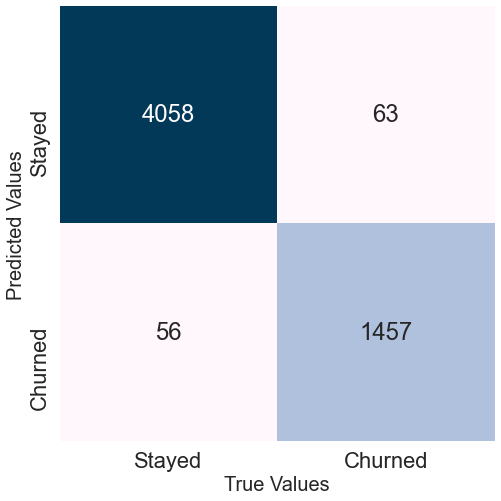

In [109]:
pred = confusion_matrix(y_test, gs_pred)
plt.figure(figsize=(8,8))

sns.heatmap(pred.T, square=True, annot=True, fmt='d',cmap="PuBu", cbar=False,
            xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
sns.set(font_scale=2)
plt.xlabel('True Values',fontsize=20)
plt.ylabel('Predicted Values',fontsize=20);
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/matrix', dpi=300)

In [141]:
# Creating a DF with the coeficients for each feature for futher visualiztions.
coef=pd.DataFrame(zip(X_train.columns, np.transpose(grid_lg.best_estimator_.coef_[0])), columns=['features', 'coef'])
coef.iloc[list(coef.coef.sort_values(ascending=False).index)].reset_index(drop=True,inplace=True)
coef.to_csv("coeficient.csv")

,features,coef
0,senior_citizen,0.002197
1,partner,1.082368
2,dependents,-0.779110
3,tenure_months,-0.033909
4,phone_service,-0.462969
...,...,...
6129,age_70,-0.125340
6130,tel_payment_method_Credit Card,-0.721443
6131,tel_payment_method_Mailed Check,-0.414275
6132,tel_contract_One Year,-0.896491


# Conclusions 

In conclusion, GridSearch with Logistic Regression proved the best model at predicting Accuracy and F1. By using this model assures that all predictions would be accurate and the company can focus on customer that are possibly churning or have churned and base their attention in recovering them or bettering their services to maintain their customer base. 

In [ ]:
### Grid Search for Logistic Regression (Best Params) 

In [105]:
# #Choosing Parameter for the model.
# params={
#     "C":[1,5,10],
#     "max_iter":range(4000,5000,50),
#     "solver":['lbfgs', 'sags']
# }

In [107]:
# grid_lg2.fit(X_train,y_train)

In [106]:
# # using vanilla Logistic Regression model and keeping the Random state for continuity and reproducibility
# log_reg2=LogisticRegression(class_weight='balanced', random_state=40,warm_start='True',penalty="l2",n_jobs=-1)
# grid_lg2=GridSearchCV(log_reg2, params, cv=10, scoring="f1", verbose=1, n_jobs=-1)

In [ ]:
# grid_lg2.fit(X_train,y_train)

# print("Best Gridsearch Score: {}".format(grid_lg2.best_score_))
# print("Best Parameters: {}".format(grid_lg2.best_params_))
# print("Best Estimators: {}".format(grid_lg2.best_estimator_))

In [ ]:
# print("Best Gridsearch Score: {}".format(grid_lg2.best_score_))
# print("Best Parameters: {}".format(grid_lg2.best_params_))
# print("Best Estimators: {}".format(grid_lg2.best_estimator_))

In [ ]:
# gs_pred2=grid_lg2.best_estimator_.predict(X_test)

In [ ]:
# gs_acc2=metrics.recall_score(y_test, gs_pred2)
# gs_rec2=metrics.accuracy_score(y_test, gs_pred2)
# gs_f12=metrics.f1_score(y_test,gs_pred2)

In [ ]:
# print('GridSearch Logistic Regression Tuned Accuracy: {}'.format(gs_acc2))
# print('GridSearch Logistic Regression Tuned Recall: {}'.format(gs_rec2))
# print('GridSearch Logistic Regression Tuned F1: {}'.format(gs_f12))

In [ ]:
# score=score.append({'Name': "GridSearch LR Tuned", "Accuracy": gs_acc2, "Recall": gs_rec2,"F1":gs_f12}, ignore_index=True)
# score

In [ ]:
adaboost
gradient boost
clustering 